In [1]:
# AIM: To plot the decision boundary for a two-feature binary classifier
# Experimenting with SVC, SVM and KNN classifiers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [5]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

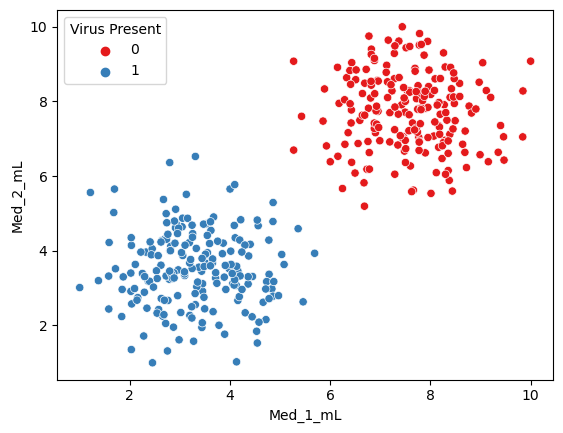

In [6]:
sns.scatterplot(df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='Set1')

In [7]:
X, y = df.drop(columns='Virus Present'), df['Virus Present']

In [8]:
x1, x2 = X['Med_1_mL'], X['Med_2_mL']

In [9]:
# This function has been adapted from the docs
def plot_hyperplane_margins(clf, X, x1, x2, y):
    # fit the model, don't regularize for illustration purposes
    clf.fit(X, y)
    
    # plt.figure(dpi=200)
    
    plt.scatter(X[x1], X[x2], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

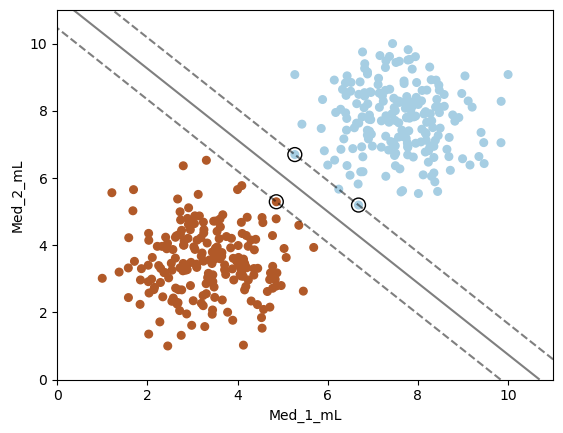

In [10]:
plot_hyperplane_margins(SVC(C=1000, kernel='linear'), X, 'Med_1_mL', 'Med_2_mL', y)

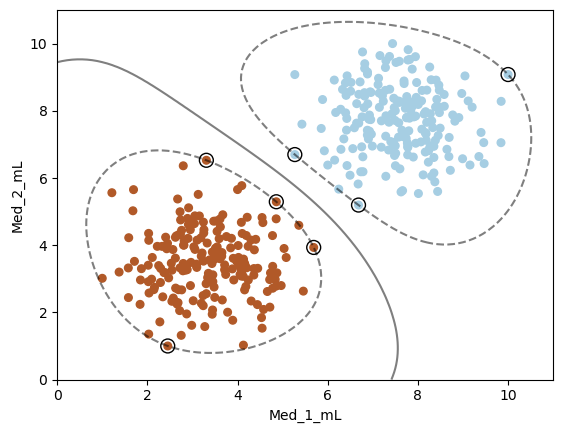

In [11]:
plot_hyperplane_margins(SVC(C=1000, kernel='rbf', gamma='scale'), X, 'Med_1_mL', 'Med_2_mL', y)

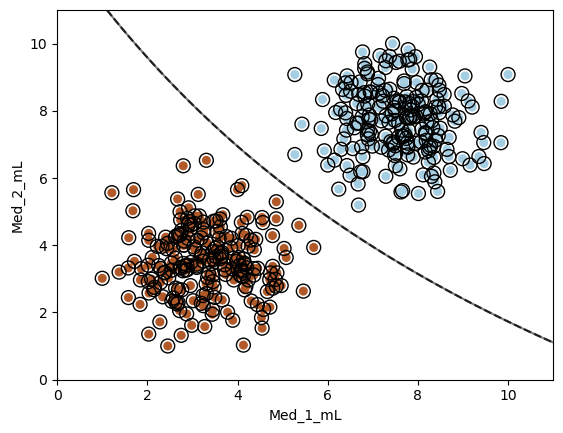

In [12]:
plot_hyperplane_margins(SVC(C=1000, kernel='sigmoid'), X, 'Med_1_mL', 'Med_2_mL', y)

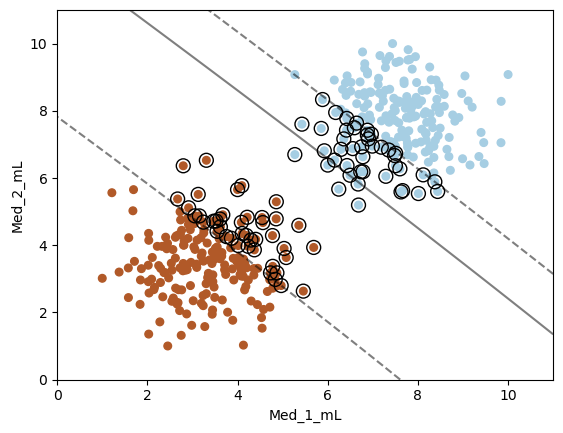

In [68]:
plot_hyperplane_margins(SVC(C=0.000001, kernel='poly', degree=5), X, 'Med_1_mL', 'Med_2_mL', y)